# Monty Hall Problem Simulation

The Monty Hall problem is a perplexing puzzle loosely inspired by the game show Let's Make a Deal and named after its original host, Monty Hall. This puzzle has garnered considerable attention due to its seemingly paradoxical solution.' This notebook primarily aims to demonstrate the validity of the seemingly counterintuitive solution and subsequently, by extending the problem to involve more doors, foster an intuitive understanding of this concept.

### The Problem

Suppose you are a contestant in a gameshow and given the choice of three doors. Behind one of the doors is a car; behind each of the other doors is a goat. Your objective is to pick the door with the car behind it, making you the winner of the game and the proud owner of a shiny new car. You make a selection, say door No. 1, and the host, who knows what is behind the doors, opens another door, say No. 3, revealing a goat. The host asks, 'Do you want to switch to the other closed door?'. The question of interest is, 'Is it advantageous to switch your choice?'.

In [1]:
# Imports
import random
import matplotlib.pyplot as plt

### Creating Functions

The following section contains functions designed for simulating game iterations, with the flexibility to extend the number of doors beyond three. This flexibility will prove valuable in our later discussion when we delve into how expanding the game makes the answer to 'Should you switch?' increasingly clear. We'll explore this concept further in the upcoming sections.

In [2]:
# Function that goes through single iteration of the Monty Hall game
def play_monty_hall_game(n_doors=3, switching=True):
    '''
    Play the Monty Hall game with the given number of doors.
    '''
    # Creating and shuffling the game space (what is behind each door)
    gamespace = ['Car'] + (n_doors - 1) * ['Goat']
    random.shuffle(gamespace)
    
    # Simulating the player's initial choice
    choice_idx = random.randint(0, n_doors - 1)

    # Logic for switching strategy
    if switching:
        if gamespace[choice_idx] == 'Car':
            # If the initial choice is a car and you switch, you are guaranteed to switch to a goat.
            return 'Loss' 
        else:
            # If the initial choice is a goat, other doors with goats are opened, leaving only the door with a car behind.
            return 'Win'

    # Logic if not switching
    else:
        if gamespace[choice_idx] == 'Car':
            return 'Win'
        else:
            return 'Loss'

In [3]:
# Function to simulate specified number of games.
def simulate_games(n_iterations, n_doors=3, switching=True):
    '''
    Simulate the Monty Hall problem with specified parameters and calculate win rates.
    '''
    winrates = []
    wins = 0
    
    for n in range(1, n_iterations + 1):
        result = play_monty_hall_game(n_doors=n_doors, switching=switching)
        if result == 'Win':
            wins += 1
        winrates.append(wins / n)
        
    return winrates

## Simulating Original Game Rules

In the original game, just three doors are presented. Therefore, we begin our analysis here to decide whether switching is advisable.

In [4]:
# Number of games to simulate
iterations = 10000

# X axis values (iteration number)
x_axis = [n for n in range(1, iterations + 1)]

# Switching strategy y values
switching_strat = simulate_games(n_iterations=iterations, n_doors=3, switching=True)

# No switching strat y values
no_switching_strat = simulate_games(n_iterations=iterations, n_doors=3, switching=False)

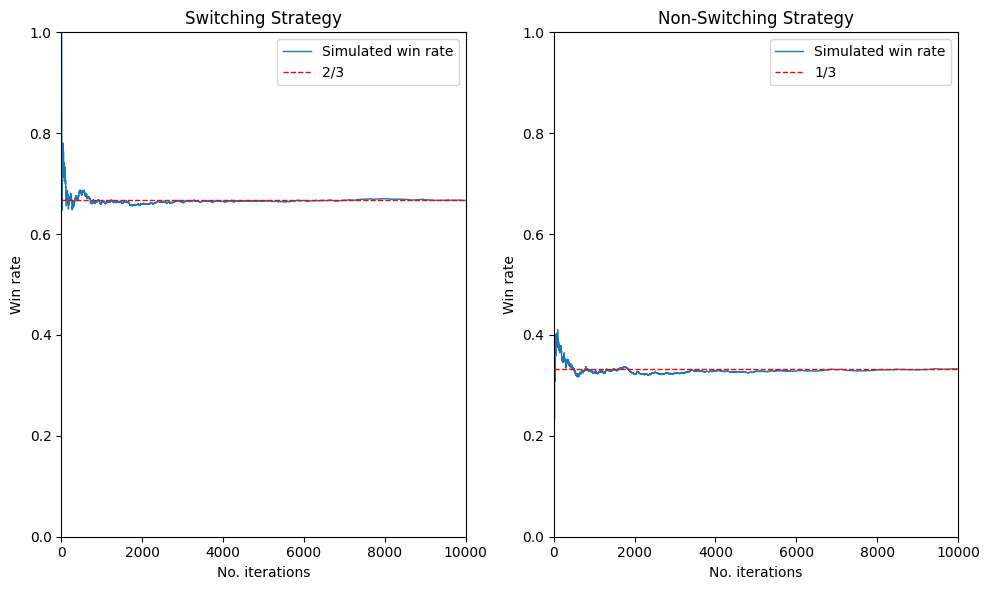

In [5]:
# Adjusting figure size
plt.figure(figsize=(10,6))

# Plot for switching strategy
plt.subplot(1, 2, 1)
plt.plot(x_axis, switching_strat, linewidth=1, label='Simulated win rate')
plt.title('Switching Strategy')
plt.xlabel('No. iterations')
plt.ylabel('Win rate')
plt.hlines(2/3, 0, iterations, linewidth=1, linestyle='--', color='r', label='2/3')
plt.axis([0, iterations, 0, 1])
plt.legend()

# Plot for non-switching strategy
plt.subplot(1, 2, 2)
plt.plot(x_axis, no_switching_strat, linewidth=1, label='Simulated win rate')
plt.title('Non-Switching Strategy')
plt.xlabel('No. iterations')
plt.ylabel('Win rate')
plt.hlines(1/3, 0, iterations, linewidth=1, linestyle='--', color='r', label='1/3')
plt.axis([0, iterations, 0, 1])
plt.legend()

# Spacing between the plots
plt.tight_layout()

# Displaying graphs
plt.show()

These plots clearly illustrate a significantly higher winning rate when employing the switching strategy, which results in a win rate of approximately 67%. Conversely, a no switching strategy yields a win rate around 33%. This is explained in the following graphic.

<center><img src='assets/monty_hall_explained.png'/></center>

## Simulating Games with More Doors

I believe that the paradoxical nature of the problem is due to the small gamespace. Instead, consider the following;

Much like before, you are a contestant in a gameshow, but you are now given the choice of one-hundred doors. Again, behind one is a car; behind the others, a goat. Your objective is still to pick the door with the car behind it. When you make a selection, the host opens all but one of the other  doors which all have a goat behind. Is it more clear now that it is in your interest to swap?

In my view, this extended version of the game makes it clearer that switching is the best choice. Let's double check with another simulation!

In [6]:
# Number of games to simulate
iterations = 10000

# Switching strategy y values
switching_strat_100_doors = simulate_games(n_iterations=iterations, n_doors=100, switching=True)

# No switching strat y values
no_switching_strat_100_doors = simulate_games(n_iterations=iterations, n_doors=100, switching=False)

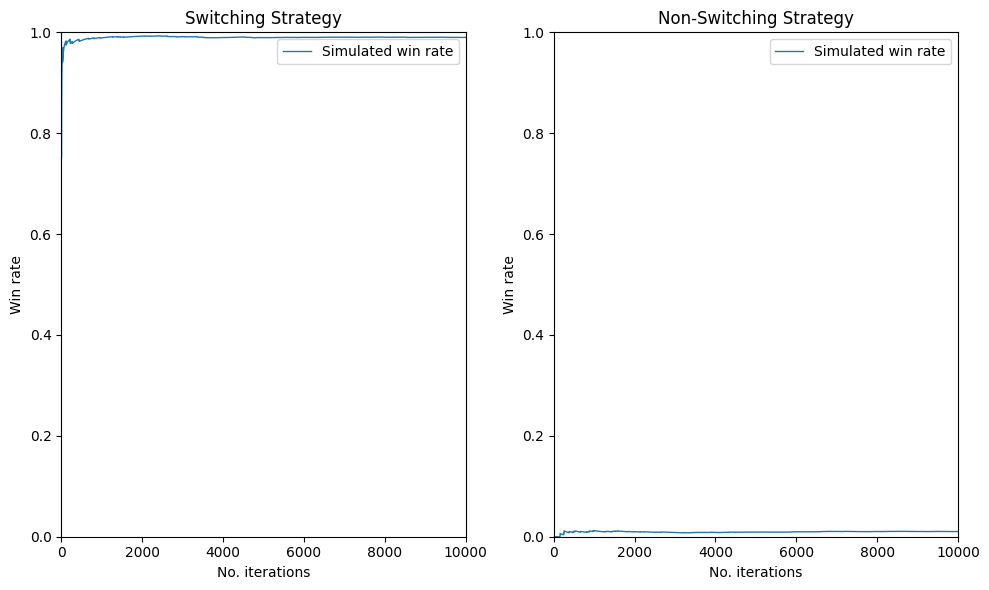

In [7]:
# Adjusting figure size
plt.figure(figsize=(10,6))

# Plot for switching strategy
plt.subplot(1, 2, 1)
plt.plot(x_axis, switching_strat_100_doors, linewidth=1, label='Simulated win rate')
plt.title('Switching Strategy')
plt.xlabel('No. iterations')
plt.ylabel('Win rate')
plt.axis([0, iterations, 0, 1])
plt.legend()

# Plot for non-switching strategy
plt.subplot(1, 2, 2)
plt.plot(x_axis, no_switching_strat_100_doors, linewidth=1, label='Simulated win rate')
plt.title('Non-Switching Strategy')
plt.xlabel('No. iterations')
plt.ylabel('Win rate')
plt.axis([0, iterations, 0, 1])
plt.legend()

# Spacing between the plots
plt.tight_layout()

# Displaying graphs
plt.show()

The plots clearly demonstrate that it is advantageous to swap when playing with 100 doors. In this scenario, the switching strategy yields win rate of around 99%, while the non-switching strategy lags far behind at only 1%. The underlying rationale behind this outcome closely parallels that of the three-door scenario.

# Conclusion
With that, we bring our exploration of the Monty Hall problem to a close. My hope is that, for those who may have harboured doubts about the validity of the solution, this notebook has instilled confidence in its correctness. And for those who have already intuited this concept, I hope to inspire an appreciation for the utility of simulations as a method to validate solutions when problems allow for it.